In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_training(run_name):
    results = {}
    time_ranges = ['all','2d','5d','13d', 'noDS']
    for time_range in time_ranges:
        results[time_range] = pd.read_csv(run_name+time_range+'.csv')
        plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Micro-F1 score')
    plt.show()
    return results

In [3]:
run_4_chunks = 'results/Definitive_4_chunks_'


Text(0, 0.5, 'Micro-F1 score')

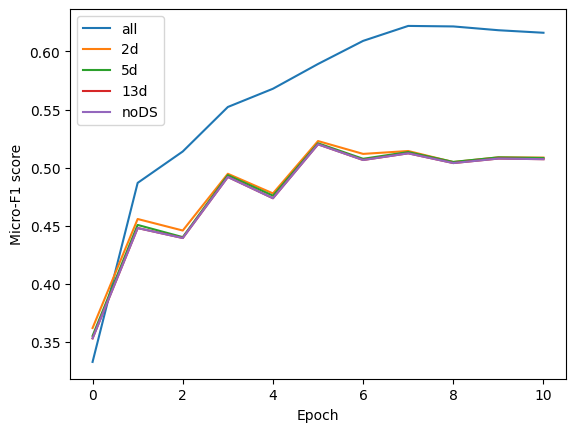

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

run_name = 'results/Definitive_temp_4_'
time_ranges = ['all','2d','5d','13d', 'noDS']
results = {}
for time_range in time_ranges:
    results[time_range] = pd.read_csv(run_name+time_range+'.csv')
    plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Micro-F1 score')

Text(0, 0.5, 'Micro-F1 score')

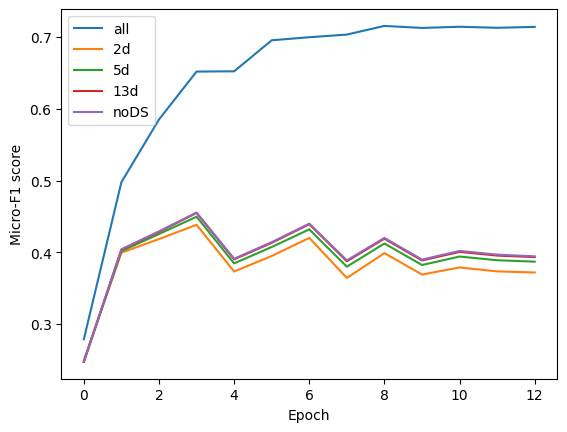

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_16_20_epochs_'
time_ranges = ['all','2d','5d','13d', 'noDS']
results = {}
for time_range in time_ranges:
    results[time_range] = pd.read_csv(run_name+time_range+'.csv')
    plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Micro-F1 score')

In [11]:
results['all'].columns

Index(['Unnamed: 0.13', 'Unnamed: 0.12', 'Unnamed: 0.11', 'Unnamed: 0.10',
       'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6',
       'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'validation_f1_macro',
       'validation_f1_micro', 'validation_f1_by_class', 'validation_auc_macro',
       'validation_auc_micro', 'validation_auc_by_class', 'validation_p_5',
       'validation_LRAP', 'validation_metrics_sample_size', 'train_f1_macro',
       'train_f1_micro', 'train_f1_by_class', 'train_auc_macro',
       'train_auc_micro', 'train_auc_by_class', 'train_p_5', 'train_LRAP',
       'train_metrics_sample_size', 'epoch', 'curr_lr', 'run_name',
       'project_path', 'base_checkpoint', 'num_attention_heads', 'num_layers',
       'lr', 'max_chunks', 'grad_accumulation', 'use_positional_embeddings',
       'use_reverse_positional_embeddings', 'priority_mode', 'priority_idxs',
       'use_document_embeddings', 'use_reverse_

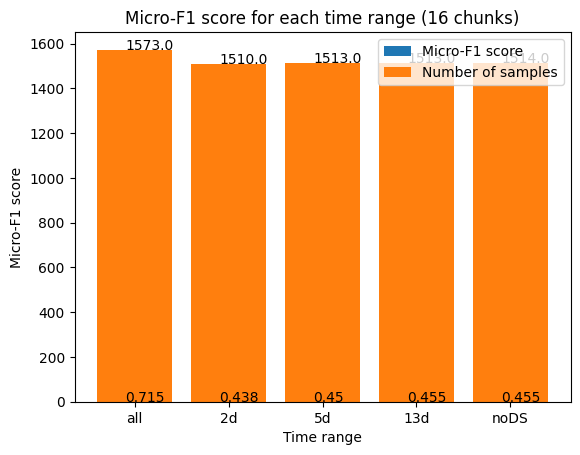

In [13]:
# write code to visualize the validation_f1_score for each time range in the last epoch

plt.bar(range(len(results)), [results[key]['validation_f1_micro'].iloc[-1] for key in results.keys()], align='center')
plt.xticks(range(len(results)), list(results.keys()))
# display value on top of each bar
for i, v in enumerate([results[key]['validation_f1_micro'].max() for key in results.keys()]):
    plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
# create another bar plot for the number of samples in each time range
plt.bar(range(len(results)), [results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], align='center')
plt.xticks(range(len(results)), list(results.keys()))
# display value on top of each bar
for i, v in enumerate([results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
    plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
plt.legend(['Micro-F1 score', 'Number of samples'])

plt.ylabel('Micro-F1 score')
plt.xlabel('Time range')
plt.title('Micro-F1 score for each time range (16 chunks)')
plt.show()
